<a href="https://colab.research.google.com/github/neko88/GoogleCollab/blob/main/Tensorflow_Intro_01_Fashion_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Intro to Tensorflow following the activity on [Tensorflow's basic image classification](https://www.tensorflow.org/tutorials/keras/classification).

In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


# 1) Import the Fashion MNIST data set

In [27]:
# Data set contains 60k images to train and 10k images to evaluate how accurately the network learned to classify images.
fashion_mnist = tf.keras.datasets.fashion_mnist

# Load data set into NumPy arrays of training sets and test sets.
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Images are 28x28 NumPy arrays with pixel values from 0 to 255.
Labels are an array of ints,ranging from 0 to 9 - these correspond to class of clothing:

Label	Class
0.	T-shirt/top
1.	Trouser
2.	Pullover
3.	Dress
4.	Coat
5.	Sandal
6.	Shirt
7.	Sneaker
8.	Bag
9.	Ankle boot

Each image is mapped to a single label.

In [28]:
# Store the class names in DS
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

# 2) Explore the Data
Explore the format of the dataset before training the model

In [29]:
train_images.shape

(60000, 28, 28)

In [30]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [31]:
test_images.shape

(10000, 28, 28)

In [32]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

# 3) Preprocess the Data

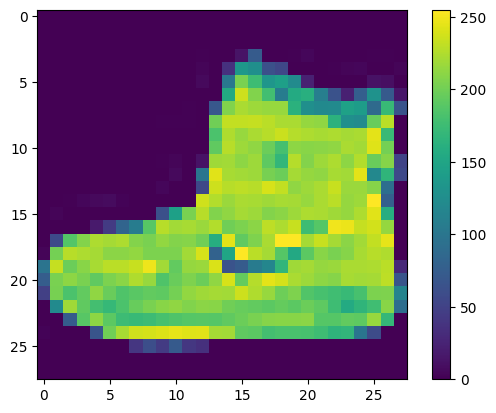

In [33]:
# Import the Fashion MNIST data set Plotting the figure, we see that the pixel values fall in the range of 0 to 255
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [34]:
# Scale the values to range from 0 to 1. We do this by dividing each pixel value by 255.
# Training and testing sets must be preprocessed in the same way.

train_images = train_images/255
test_images = test_images/255

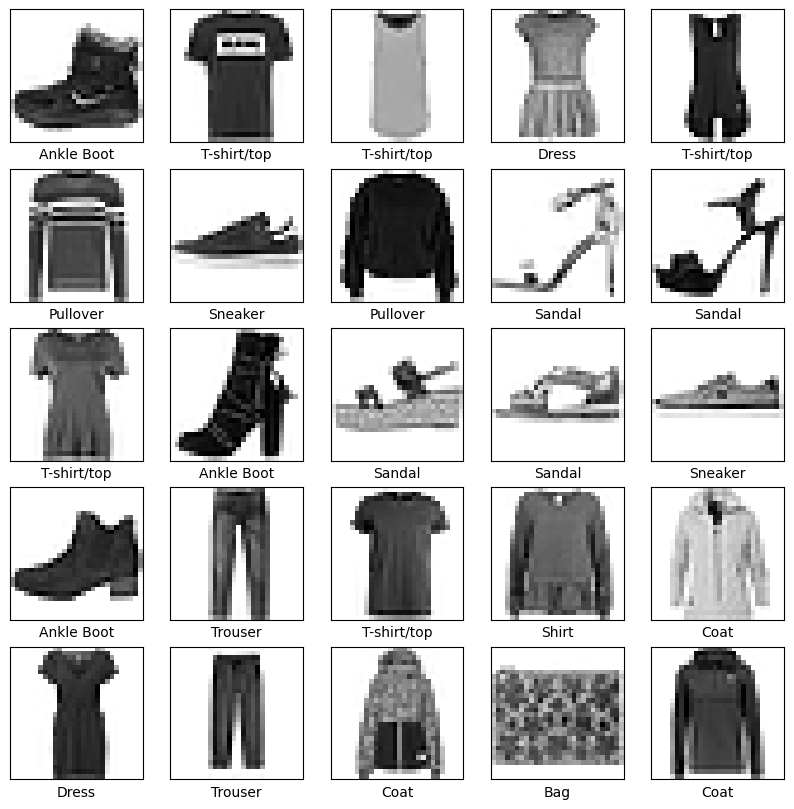

In [35]:
# Verify the data is in correct format by displaying first 25 images from the training set with its class name below each image

plt.figure( figsize=(10,10) )

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])        # removes numerical ticks for each image displayed
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

plt.show()

# 4) Build the model
Building the nerual network requires configuring the layers of the model, then compiling the model

**4.1: Set up the Layers**
The basic building block of a neural network is a layer.
Layers *extract representations* from the data fed into them.

Most deep learning chain together simple layers.
Most layers such as 

```
tf.keras.layers.Dense
```
have parameters that are learned during training.

In [36]:
# 'Flatten' transforms the format of imgs from a 2D array to a 1D array
    # From [2D array 28x28 pixels]  to [ 1D array 28*28 = 784 pixels]

# 'Dense' layers are in the network, which are densely/fully connected, neural layers.
    # First Dense layer has 128 nodes
    # Second Dense layer returns a logits array of length 10. 
        # Each node in this layer contains a score that indicates the current image belongs to one of the 10 classes.

model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),     
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10)
])

**4.2: Compile the Model**
We need to compile the model before training with:


*   Loss Function - measures the accuracy of model during training. Minimize this function to achieve more accurate results.
*   Optimizer - How the model is updated based on data it sees and its loss function.
* Metrics - Used to monitor training and test steps. Use the metric 'Accuracy' as the fraction of images that are correctly classified.



In [37]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 5) Training the Model
Training the NN model requires:
1. Feed training data sets to model.
2. Model learns to associate images and labels.
3. Ask model to predict based on a test set.
4. Verify the predictions match labels.

**5.1: Feed the Model**

In this stage we 'fit' the model to the training data. 
As the model trains, the loss and accuracy metrics are displayed.
**'epochs'** are the number of iterations the model will train on the data.

In [38]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5020 - accuracy: 0.8238
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3760 - accuracy: 0.8646
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3395 - accuracy: 0.8754
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3159 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2968 - accuracy: 0.8908
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2804 - accuracy: 0.8954
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2701 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2581 - accuracy: 0.9051
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2484 - accuracy: 0.9068
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2

**5.2: Evaluate Accuracy**

Now that the model is trained, we can see how it performs on how accurate it is on the test set. 
**Overfitted Models** are machine models that perform worse on new unseen inputs than it does on the training data - due to 'memorizing' noise and details in the training dataset where it negatively impacts the performance of the model when tested with new data.

In [39]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3304 - accuracy: 0.8860 - 615ms/epoch - 2ms/step

Test accuracy: 0.8859999775886536


**5.3: View Predictions**

We can use the trained model to view its predictions about some images.

Attach **softmax layer** to convert the model's linear outputs (**logits**) to **probabilities**.

**Predictions** are represented as an array of probability. They are the model's 'confidence' that the image corresponds to each of the 10 different articles of clothing.

In [40]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [42]:
# The model predicts the label for each image in the testing set.
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [43]:
# Check the first prediction
predictions[0]

array([2.8447829e-07, 2.0825999e-09, 2.7092943e-07, 7.6687379e-10,
       5.5534781e-07, 1.4423674e-02, 6.2520207e-06, 6.4412118e-03,
       8.3745732e-08, 9.7912759e-01], dtype=float32)

In [44]:
np.argmax(predictions[0])

9

The model is confident that the image, `predictions[0]`, is an ankle boot, or `class_names[9]`. 

We can check by examining the test label that the classification is correct:

In [45]:
test_labels[0]

9

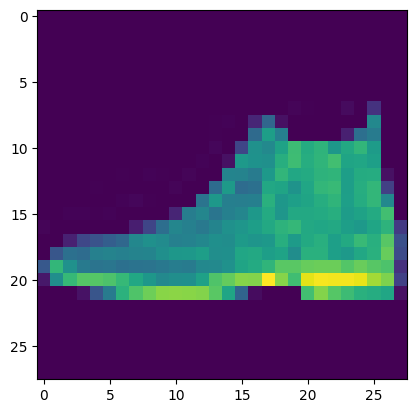

In [48]:
# Checking back what the test image is at [0]
plt.figure()
plt.imshow(test_images[0])
plt.show()

**5.4: Verify Predictions**

Lets look back to the 0th image, predictions, and prediction array 

*   Blue - Correct prediction labels
*   Red - Incorrect prediction labels



In [50]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

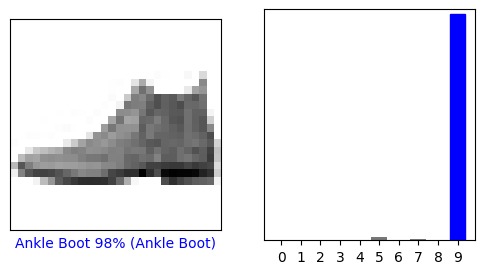

In [55]:
# Display the predicted image and label, with its prediction value
i = 0

plt.figure( figsize=(6,3) )
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)

plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

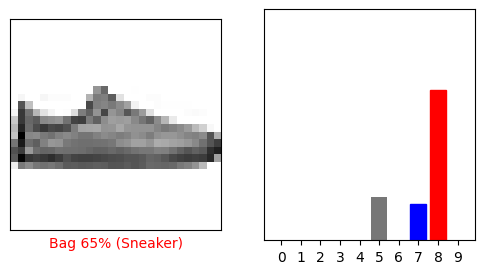

In [56]:
i = 12

plt.figure( figsize=(6,3) )
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)

plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

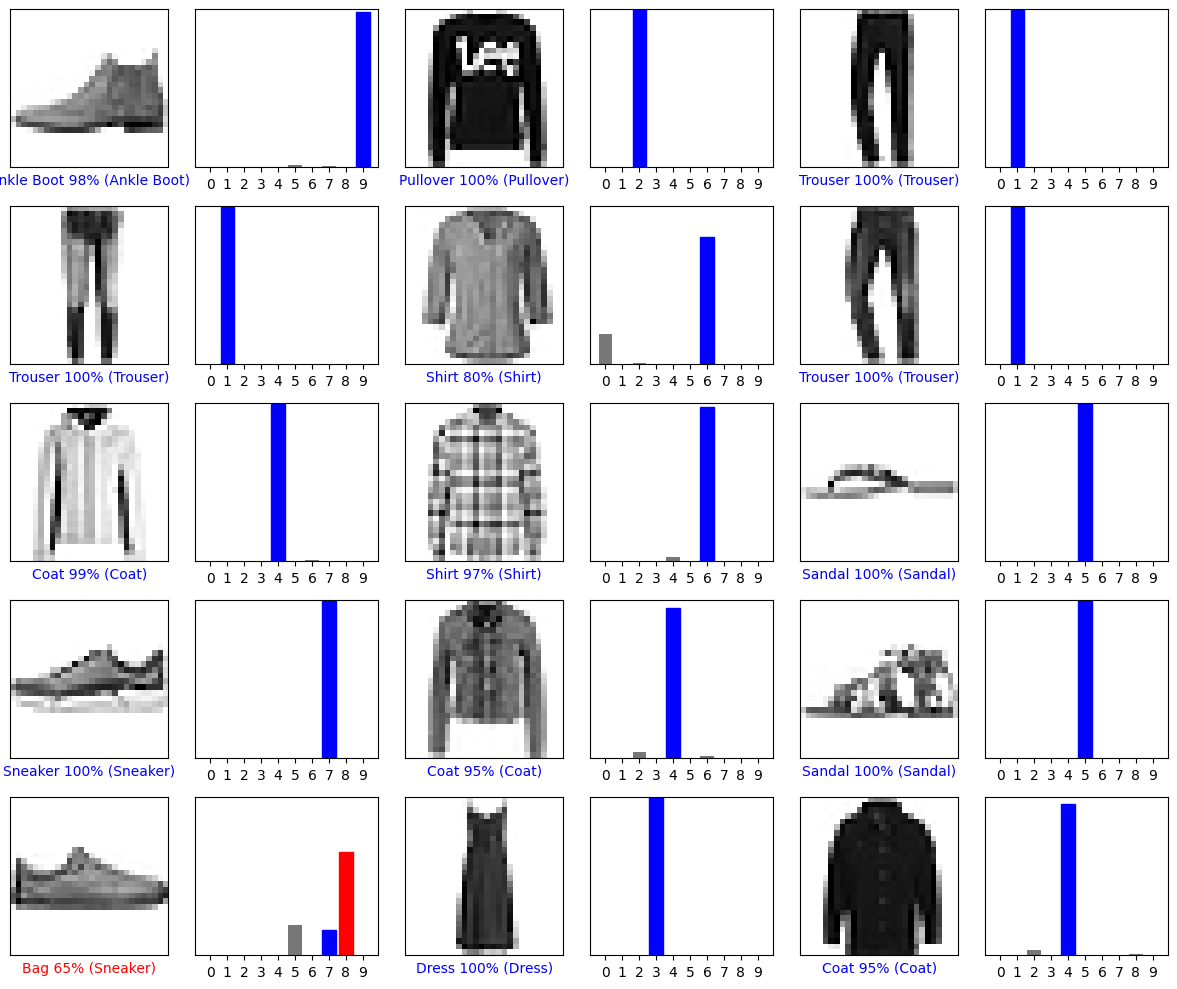

In [58]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# 6) Use the Trained Model

Finally, use the trained model to make a prediction about a single image.

In [59]:
# Grab an image from the test data set.
img = test_images[1]
print(img.shape) 

(28, 28)


In [60]:
# Add the image to a batch (collection) where its the only member.
# tf.keras models are optimized to make predictions on batches at once.

img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [61]:
# Predict the label
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 23ms/step
[[6.4144209e-05 6.2517488e-13 9.9907088e-01 1.5826894e-10 8.2491682e-04
  8.3007122e-16 4.0023951e-05 2.8106733e-18 1.0752201e-09 7.5859644e-15]]


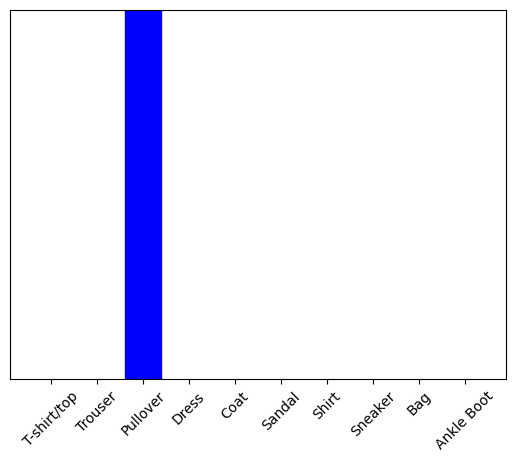

In [62]:
# Plot the prediction
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)       # For the x-axis labels
plt.show()

In [63]:
# Grab the prediction in our batch:
np.argmax(predictions_single[0])

2

# Fini!

In [ ]:
# MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.